<div class="alert alert-block alert-info" align=center><b></b>

# Fraud Detection System

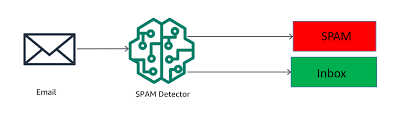

In [3]:
from IPython.display import Image
Image(filename='Pavan.png')

<div class="alert alert-block alert-info" align=center><b></b>

# Problem Statement

Detecting fraud early can save significant financial losses and
protect customer trust.

<div class="alert alert-block alert-info" align=center><b></b>

# LET'S START

<div class="alert alert-block alert-info" align=center><b></b>
    
    My Name is Pavan Kalyan Namala and  I will take you the journey of Email Spam Detection

In [5]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB 1.3 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/301.4 kB 393.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 655.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/301.4 kB 722.1 kB/s eta 0:00:01
   ----------------------------- ---------- 225.3/301.4 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.0 MB/s eta 0:00:00


In [6]:
import nltk
import wordcloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pavan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('email_spam.csv')

In [9]:
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [11]:
df.shape

(84, 3)

In [12]:
df.isnull().sum()

title    0
text     0
type     0
dtype: int64

In [13]:
df['type'].value_counts()

type
not spam    58
spam        26
Name: count, dtype: int64

In [14]:
encoding={"type":{"not spam":1,"spam":0}}
df.replace(encoding,inplace=True)

In [15]:
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",0
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",1
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",1
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",1
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",0


In [16]:
df['length']=df.text.str.len()
df.head()

,title,text,type,length
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",0,302
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",1,350
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",1,166
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",1,399
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",0,6079


In [17]:
df['text']=df['text'].str.lower()
df.head()

,title,text,type,length
0,?? the secrets to SUCCESS,"hi james,\n\nhave you claim your complimentary...",0,302
1,?? You Earned 500 GCLoot Points,"\nalt_text\ncongratulations, you just earned\n...",1,350
2,?? Your GitHub launch code,"here's your github launch code, @mortyj420!\n ...",1,166
3,[The Virtual Reward Center] Re: ** Clarifications,"hello,\n \nthank you for contacting the virtua...",1,399
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","hey prachanda rawal,\n\ntoday's newsletter is ...",0,6079


In [18]:
df['text'] = df['text'].str.replace(r'^.+@[^\.*].[a-z]{2,}$', 'emailaddress', regex=True)
df['text'] = df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)', 'webaddress', regex=True)
df['text'] = df['text'].str.replace(r'€|\$', 'dollars', regex=True)
df['text'] = df['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber', regex=True)
df['text'] = df['text'].str.replace(r'\d+(\.\d+)?', 'number', regex=True)
df['text'] = df['text'].str.replace(r'[^\w\d\s]', '', regex=True)
df['text'] = df['text'].str.replace(r'\s+', '', regex=True)
df['text'] = df['text'].str.replace(r'^s+?$', '', regex=True)
df['text'] = df['text'].str.replace(r'_', '', regex=True)

In [19]:
df.head()

,title,text,type,length
0,?? the secrets to SUCCESS,hijameshaveyouclaimyourcomplimentarygiftyetive...,0,302
1,?? You Earned 500 GCLoot Points,alttextcongratulationsyoujustearnednumberyouco...,1,350
2,?? Your GitHub launch code,heresyourgithublaunchcodemortyjnumberanoctocat...,1,166
3,[The Virtual Reward Center] Re: ** Clarifications,hellothankyouforcontactingthevirtualrewardcent...,1,399
4,"10-1 MLB Expert Inside, Plus Everything You Ne...",heyprachandarawaltodaysnewsletterisjampackedwi...,0,6079


In [20]:
import string
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english')+['u','ü','ur','4','2','im','dont','doin','ure'])
df['text']=df['text'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [21]:
df['clean_length']=df.text.str.len()
df.head()

,title,text,type,length,clean_length
0,?? the secrets to SUCCESS,hijameshaveyouclaimyourcomplimentarygiftyetive...,0,302,231
1,?? You Earned 500 GCLoot Points,alttextcongratulationsyoujustearnednumberyouco...,1,350,296
2,?? Your GitHub launch code,heresyourgithublaunchcodemortyjnumberanoctocat...,1,166,131
3,[The Virtual Reward Center] Re: ** Clarifications,hellothankyouforcontactingthevirtualrewardcent...,1,399,320
4,"10-1 MLB Expert Inside, Plus Everything You Ne...",heyprachandarawaltodaysnewsletterisjampackedwi...,0,6079,4903


In [22]:
df.length.sum()

71038

In [23]:
df.clean_length.sum()

58028

In [24]:
df.length.sum()-df.clean_length.sum()

13010

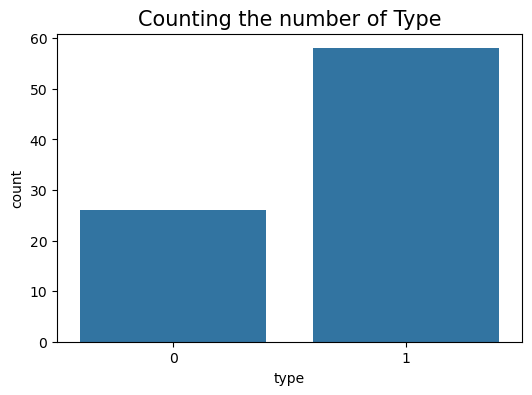

type
1    58
0    26
Name: count, dtype: int64

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df)
plt.title('Counting the number of Type', fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

df.type.value_counts()


In [26]:
#SVM
tf_vec = TfidfVectorizer()



SVM=SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

features = tf_vec.fit_transform(df['text'])

X=features
y=df['type']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

SVM.fit(X_train,y_train)
y_pred=SVM.predict(X_test)

In [28]:
accuracy_score(y_test,y_pred)

0.7058823529411765

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.92      0.83        13

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
#Naive Bayes
nb=MultinomialNB()
tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(df['text'])
X = features
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7058823529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.92      0.83        13

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17

Confusion Matrix:
 [[ 0  4]
 [ 1 12]]


In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(df['text'])
X = features
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7647058823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      1.00      0.87        13

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17

Confusion Matrix:
 [[ 0  4]
 [ 0 13]]


In [33]:
#Random Foret
from sklearn.ensemble import RandomForestClassifier

tf_vec = TfidfVectorizer()

features = tf_vec.fit_transform(df['text'])
X = features
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


rf = RandomForestClassifier(n_estimators=50, random_state=0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7058823529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.92      0.83        13

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17

Confusion Matrix:
 [[ 0  4]
 [ 1 12]]
Accuracy: 0.7058823529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.75      0.92      0.83        13

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17

Confusion Matrix:
 [[ 0  4]
 [ 1 12]]


In [34]:
#XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=0)


params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 50,
    'eval_metric': 'logloss'
}
xgb_model.set_params(**params)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7647058823529411
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      1.00      0.87        13

    accuracy                           0.76        17
   macro avg       0.38      0.50      0.43        17
weighted avg       0.58      0.76      0.66        17

Confusion Matrix:
 [[ 0  4]
 [ 0 13]]


## Thank You Visit Again